In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Load the dataset
data = pd.read_csv('car.csv')

# Drop unnecessary columns
data.drop(columns=['week', 'car_name'], inplace=True)

# Define the target variable and separate features and target
target = 'price'
X = data.drop(target, axis=1)
y = data.loc[:, target]

# Encode categorical features
encoder = OneHotEncoder(handle_unknown = 'ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=20)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [3]:
y_pred = model.predict(X_test)

In [4]:
print(list(X))
print(model.coef_)
print(model. intercept_)

['date', 'engine', 'seater']
[-1.71531329e+04  1.92619763e+04  4.86835972e+04  6.72893157e+04
  8.06640584e+04  4.60049778e+04  3.56190960e+04  2.21706784e+04
  2.52288921e+04  2.79429884e+04  2.00702681e+04 -1.33968347e+04
 -3.21752548e+04 -2.63307072e+04 -3.22008916e+04 -2.77168169e+04
  1.24405424e+03  2.01627152e+04  3.42142312e+04 -5.54754393e+03
 -1.98329441e+04 -2.28040376e+04 -2.22160850e+04 -1.11890647e+04
 -9.98368284e+03 -8.18494899e+03 -2.61391827e+04 -2.23653526e+04
 -2.22425420e+04 -2.00825990e+04 -7.03597016e+03 -6.34771657e+03
 -9.46397100e+03 -2.03815308e+04 -1.76590391e+04 -2.07899104e+04
 -2.13445346e+04 -5.97255509e+03 -1.70287634e+04 -9.68308054e+01
 -8.13032598e+03  2.52559201e+04 -7.34344984e+04 -6.13455290e+04
 -1.82748078e+04  1.84220143e+03 -1.60632281e+04 -1.09390308e+04
 -2.55628895e+04  2.03777782e+05]
146465.15535214526


In [5]:
# 실젯값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

[120000  44000  72000 330000  90000 138000  77000 135000 103500 115500]
[133706.39275575  46603.11896344 104828.00260154 343356.66578473
 112965.78398612 119237.02680597  99270.111183   130445.8146204
 104612.56222672 120344.08674184]


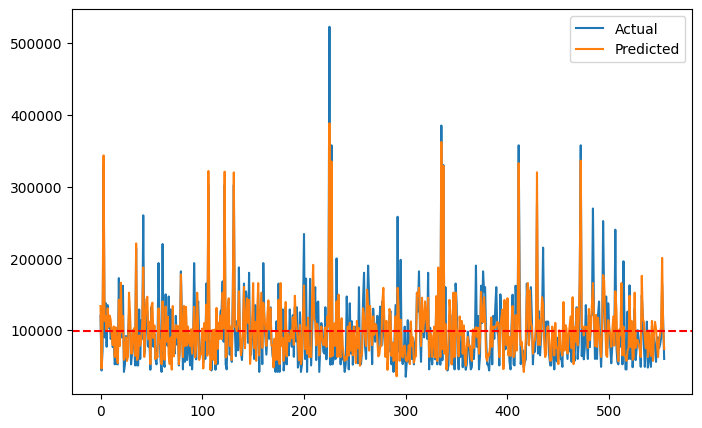

In [6]:
import matplotlib.pyplot as plt
# 실젯값, 예측값 시각화
plt.figure(figsize=(8, 5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(y_test.mean(), color='r', linestyle='--')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [7]:
# 함수 불러오기
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 20856.74621057358
MSE: 765783316.834035
RMSE: 27672.790188812458
R2-Score: 0.7438900982086827


In [8]:
# 성능 평가
print('Score:', model.score(X_test, y_test))

Score: 0.7438900982086827


In [9]:
def predict_car_price(date, engine, seater):
    # Preprocess the user input to match the format of the training data
    user_input = pd.DataFrame({
        'date': [date],
        'engine': [engine],
        'seater': [seater]
    })

    # Perform one-hot encoding for categorical features
    user_input_encoded = encoder.transform(user_input)

    # Make predictions
    predicted_price = model.predict(user_input_encoded)

    return predicted_price[0]

# Example usage
date = "2023-07-28"
engine = "디젤 "
seater = 5

predicted_value = predict_car_price(date, engine, seater)
print(f"Predicted price with {engine} engine and {seater} seater on {date}: {predicted_value}")

Predicted price with 디젤  engine and 5 seater on 2023-07-28: 144278.6161275226


In [10]:
import joblib

#피클링 파일 생성
joblib.dump(model, './car_model.pkl')

['./car_model.pkl']

In [11]:
joblib.dump(encoder, './car_encoder.pkl')

['./car_encoder.pkl']